# Estimativas de localização da população e taxas de homicídio

Neste _notebook_ são analidados um conjunto de dados contendo a população e a taxa de homicídio (em unidades de homicídios por 100.000 habitantes por ano) para cada estado dos Estados Unidos, conforme o Censo de 2010.

**Bibliotecas importadas**

In [62]:
!pip install -q wquantiles

In [63]:
import wquantiles
import numpy as np 
import pandas as pd
from scipy import stats
from statsmodels.robust.scale import mad
import matplotlib.pyplot as plt

In [64]:
plt.style.use('bmh')

**Carregamento dos dados**

In [65]:
state = pd.read_csv('../data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Medidas de tendência central

A população média e mediana é a seguinte:

In [66]:
avg = state['Population'].mean()
median = state['Population'].median()

head = f"{'Média':>15s} | {'Mediana':>15s}"
print("=" * len(head))
print(head)
print("-" * len(head))
print(f"{avg:>15.4f} | {median:>15.4f}")
print("-" * len(head))

          Média |         Mediana
---------------------------------
   6162876.3000 |    4436369.5000
---------------------------------


A taxa de homicídios média e mediana, ponderadas pela população de cada estado é a seguinte:

In [67]:
murder_rate_avg_pop = np.average(state['Murder.Rate'], weights=state['Population'])
murder_rate_median_pop = wquantiles.median(state['Murder.Rate'], weights=state['Population'])

head = f"{'Média ponderada':15s} | {'Mediana ponderada':17s}"
print("=" * len(head))
print(head)
print("-" * len(head))
print(f"{murder_rate_avg_pop:>15.4f} | {murder_rate_median_pop:>17.4f}")
print("-" * len(head))

Média ponderada | Mediana ponderada
-----------------------------------
         4.4458 |            4.4000
-----------------------------------


### Medidas de dispersão

O desvio padrão, a intervalo interquartil ($IQR$) e o desvio absoluto mediano ($MAD$) da variável `Population` são mostrados abaixo:

In [68]:
std_pop = state['Population'].std()
iqr_pop = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
mad_pop = mad(state['Population'])

head = f"{'STD':>15s} | {'IQR':>15s} | {'MAD':>15s}"
print("=" * len(head))
print(head)
print("-" * len(head))
print(f"{std_pop:>15.4f} | {iqr_pop:>15.4f} | {mad_pop:>15.4f}")
print("-" * len(head))

            STD |             IQR |             MAD
---------------------------------------------------
   6848235.3474 |    4847308.0000 |    3849876.1460
---------------------------------------------------


## Gráficos exploratórios básicos para _data frame_

- Gráfico de caixas ou _Boxplot_

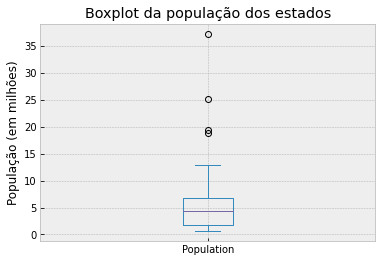

In [69]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('População (em milhões)')
ax.set_title('Boxplot da população dos estados')
plt.show()


## Tabela de frequências e Histogramas

In [70]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts().to_frame().sort_index(ascending=True)

,Population
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(26246857.0, 29915890.0]",0
"(29915890.0, 33584923.0]",0
"(33584923.0, 37253956.0]",1
